# Import Packages

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
%matplotlib inline
import seaborn as sns

import datetime as dt

import missingno as msno # viz missing values

sns.set_style("darkgrid")
import itertools

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Utility Functions and Pipelines

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [6]:
def report(true_y, pred_y, class_names):
    
    # Matthews Correlation Coefficient
    Matthews_Coefficient = round(metrics.matthews_corrcoef(true_y, pred_y),2)
    print(f'Matthews Coefficient: {Matthews_Coefficient}') # values over 0.7 are considered good scores

# Read datasets

In [7]:
PastCust_trans_labeled_2 = pd.read_excel('PastCust_trans_labeled_2.xlsx')

In [9]:
PastCust_trans_cut_f3t_labeled_2 = pd.read_excel('PastCust_trans_cut_f3t_labeled_2.xlsx')

In [11]:
PastCust_trans_cut_f3m_labeled_2 = pd.read_excel('PastCust_trans_cut_f3m_labeled_2.xlsx')

In [13]:
PastCust_demo_cat_labeled_2 = pd.read_excel('PastCust_demo_cat_labeled_2.xlsx')

In [15]:
PastCust_demo_labeled_2 = pd.read_excel('PastCust_demo_labeled_2.xlsx')

# Transaction data

In [17]:
PastCust_trans_labeled_2.head()

,customer_id,product_age_new,product_age_old,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,Mountain,...,Standard,Touring,product_class_high,product_class_low,product_class_medium,product_size_large,product_size_medium,product_size_small,multi_trans,cluster
0,1,2,9,4,2,2,2,1,0,1,...,7,0,1,2,8,0,9,2,0,high
1,2,1,2,1,0,0,0,0,2,0,...,3,0,0,0,3,0,3,0,0,low
2,3,4,3,2,2,0,0,3,0,1,...,3,0,1,2,4,3,2,2,0,high
3,4,0,2,1,0,0,1,0,0,0,...,2,0,0,0,2,1,1,0,0,low
4,5,3,3,1,2,0,1,1,1,1,...,2,0,1,2,3,2,2,2,0,high


## Split data into training, test, and validation sets

In [18]:
df = PastCust_trans_labeled_2.drop(columns = ['customer_id'], axis=1)

In [19]:
X = df.drop(columns=['cluster']).copy()
y = df['cluster']

In [20]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [21]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [22]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2792, 19), the shape of y_train is  (2792,)
the shape of X_valid is (349, 19), the shape of y_valid is  (349,)
the shape of X_test is (349, 19), the shape of y_test is  (349,)


## Fit model

In [23]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [24]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.84      0.76      0.80       153
         low       0.83      0.88      0.85       196

    accuracy                           0.83       349
   macro avg       0.83      0.82      0.83       349
weighted avg       0.83      0.83      0.83       349



Classification report: DT
-------------------------------
Matthews Coefficient: 0.66


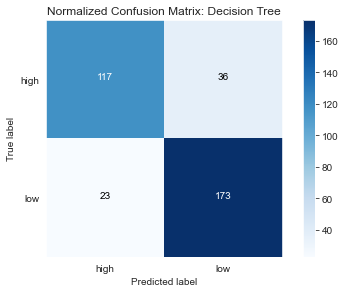

In [25]:
class_names = ['high', 'low']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

Feature: 0, Score: 0.02359
Feature: 1, Score: 0.01301
Feature: 2, Score: 0.02020
Feature: 3, Score: 0.01754
Feature: 4, Score: 0.01481
Feature: 5, Score: 0.02412
Feature: 6, Score: 0.01893
Feature: 7, Score: 0.01758
Feature: 8, Score: 0.01298
Feature: 9, Score: 0.04570
Feature: 10, Score: 0.40236
Feature: 11, Score: 0.03622
Feature: 12, Score: 0.05725
Feature: 13, Score: 0.05638
Feature: 14, Score: 0.17896
Feature: 15, Score: 0.01870
Feature: 16, Score: 0.02424
Feature: 17, Score: 0.01171
Feature: 18, Score: 0.00570


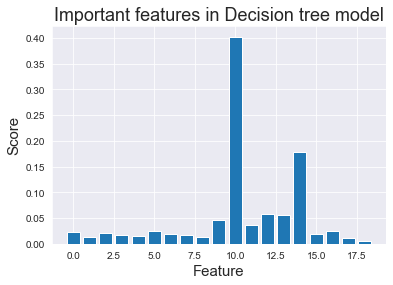

In [386]:
# plotting feature importances
importance = dtclf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.xlabel('Feature', fontsize =15)
plt.ylabel('Score', fontsize =15)
plt.title('Important features in Decision tree model', fontsize =18)
plt.show()

plt.show()

In [387]:
# Here are the top 5 important features
# X.columns[[14,10,13,12,9]]
X.columns[[9,10,11,12,13,14]]

Index(['Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium'],
      dtype='object')

# Transaction data (first three transactions)

## Split data into training, test, and validation sets

In [26]:
df = PastCust_trans_cut_f3t_labeled_2.drop(columns = ['customer_id'], axis=1)

In [27]:
X = df.drop(columns=['cluster']).copy()
y = df['cluster']

In [28]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [29]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [30]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2792, 19), the shape of y_train is  (2792,)
the shape of X_valid is (349, 19), the shape of y_valid is  (349,)
the shape of X_test is (349, 19), the shape of y_test is  (349,)


## Fit model

In [31]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [32]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.49      0.48      0.49       158
         low       0.58      0.59      0.58       191

    accuracy                           0.54       349
   macro avg       0.53      0.53      0.53       349
weighted avg       0.54      0.54      0.54       349



Classification report: DT
-------------------------------
Matthews Coefficient: 0.07


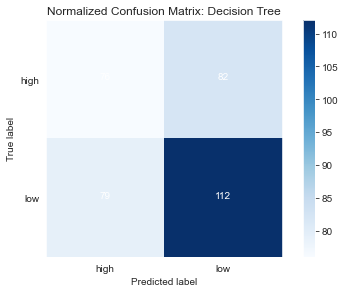

In [33]:
class_names = ['high', 'low']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [34]:
confusion_matrix(y_test,y_predict)

array([[ 76,  82],
       [ 79, 112]])

# Transaction data (first three months)

## Split data into training, test, and validation sets

In [35]:
df = PastCust_trans_cut_f3m_labeled_2.drop(columns = ['customer_id'], axis=1)

In [36]:
X = df.drop(columns=['cluster']).copy()
y = df['cluster']

In [37]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [38]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [39]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2078, 19), the shape of y_train is  (2078,)
the shape of X_valid is (260, 19), the shape of y_valid is  (260,)
the shape of X_test is (260, 19), the shape of y_test is  (260,)


## Fit model

In [40]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [41]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.55      0.49      0.52       128
         low       0.55      0.61      0.58       132

    accuracy                           0.55       260
   macro avg       0.55      0.55      0.55       260
weighted avg       0.55      0.55      0.55       260



Classification report: DT
-------------------------------
Matthews Coefficient: 0.1


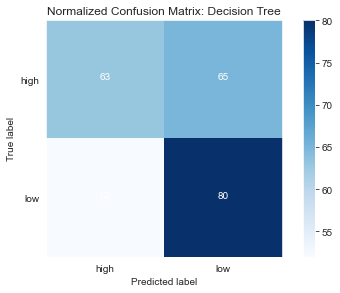

In [42]:
class_names = ['high', 'low']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [43]:
confusion_matrix(y_test,y_predict)

array([[63, 65],
       [52, 80]])

# Demographic data

In [44]:
PastCust_demo_cat_labeled_2.head()

,customer_id,gender,wealth_segment,owns_car,state,cluster,age_cat,purchase_cat,tenure_cat,property_cat
0,1,Female,Mass Customer,Yes,NSW,high,senior,senior,medium,medium
1,2,Male,Mass Customer,Yes,NSW,low,mid-age,senior,long,medium
2,4,Male,Mass Customer,No,QLD,low,senior,mid-age,medium,medium
3,5,Female,Affluent Customer,Yes,NSW,high,mid-age,senior,medium,low
4,6,Male,High Net Worth,Yes,VIC,low,senior,mid-age,medium,medium


In [45]:
PastCust_demo_labeled_2.head()

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation,cluster
0,1,Female,93,Mass Customer,Yes,11,64,NSW,10,high
1,2,Male,81,Mass Customer,Yes,16,37,NSW,10,low
2,4,Male,33,Mass Customer,No,7,56,QLD,9,low
3,5,Female,56,Affluent Customer,Yes,8,40,NSW,4,high
4,6,Male,35,High Net Worth,Yes,13,51,VIC,9,low


## Split data into training, test, and validation sets

In [46]:
df = PastCust_demo_labeled_2.drop(columns = ['customer_id'], axis=1)

In [47]:
X = df.drop(columns=['cluster']).copy()

In [48]:
X = pd.get_dummies(X) 

In [49]:
y = df['cluster']

In [50]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [51]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [52]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2726, 14), the shape of y_train is  (2726,)
the shape of X_valid is (341, 14), the shape of y_valid is  (341,)
the shape of X_test is (341, 14), the shape of y_test is  (341,)


## Fit model

In [53]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [54]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.39      0.43      0.41       139
         low       0.58      0.54      0.56       202

    accuracy                           0.50       341
   macro avg       0.49      0.49      0.48       341
weighted avg       0.50      0.50      0.50       341



Classification report: DT
-------------------------------
Matthews Coefficient: -0.03


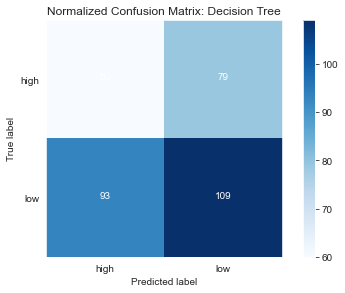

In [55]:
class_names = ['high', 'low']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

# Demo + Trans data

## Split data into training, test, and validation sets

In [56]:
df = PastCust_trans_labeled_2.merge(PastCust_demo_labeled_2, 
                                   on = 'customer_id',
                                   how = 'inner')

In [57]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster_x',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation',
       'cluster_y'],
      dtype='object')

In [58]:
df.rename(columns = {'cluster_x':'cluster'}, inplace=True)
df.drop('cluster_y', axis=1, inplace=True)

In [59]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation'],
      dtype='object')

In [60]:
df.head()

,customer_id,product_age_new,product_age_old,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,Mountain,...,multi_trans,cluster,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation
0,1,2,9,4,2,2,2,1,0,1,...,0,high,Female,93,Mass Customer,Yes,11,64,NSW,10
1,2,1,2,1,0,0,0,0,2,0,...,0,low,Male,81,Mass Customer,Yes,16,37,NSW,10
2,4,0,2,1,0,0,1,0,0,0,...,0,low,Male,33,Mass Customer,No,7,56,QLD,9
3,5,3,3,1,2,0,1,1,1,1,...,0,high,Female,56,Affluent Customer,Yes,8,40,NSW,4
4,6,3,2,2,0,0,0,1,2,0,...,0,low,Male,35,High Net Worth,Yes,13,51,VIC,9


In [61]:
df = df.drop(columns = ['customer_id'], axis=1)

In [62]:
X = df.drop(columns=['cluster']).copy()

In [63]:
X = pd.get_dummies(X) 

In [64]:
X.head()

,product_age_new,product_age_old,Giant Bicycles,Norco Bicycles,OHM Cycles,Solex,Trek Bicycles,WeareA2B,Mountain,Road,...,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC
0,2,9,4,2,2,2,1,0,1,3,...,1,0,0,0,1,0,1,1,0,0
1,1,2,1,0,0,0,0,2,0,0,...,0,1,0,0,1,0,1,1,0,0
2,0,2,1,0,0,1,0,0,0,0,...,0,1,0,0,1,1,0,0,1,0
3,3,3,1,2,0,1,1,1,1,3,...,1,0,1,0,0,0,1,1,0,0
4,3,2,2,0,0,0,1,2,0,0,...,0,1,0,1,0,0,1,0,0,1


In [65]:
y = df['cluster']

In [66]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [67]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [68]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2726, 33), the shape of y_train is  (2726,)
the shape of X_valid is (341, 33), the shape of y_valid is  (341,)
the shape of X_test is (341, 33), the shape of y_test is  (341,)


## Fit model

In [69]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [70]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.85      0.83      0.84       156
         low       0.86      0.88      0.87       185

    accuracy                           0.86       341
   macro avg       0.86      0.85      0.85       341
weighted avg       0.86      0.86      0.86       341



Classification report: DT
-------------------------------
Matthews Coefficient: 0.71


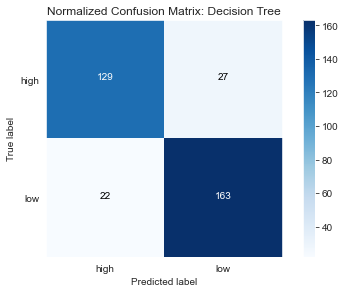

In [71]:
class_names = ['high', 'low']
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

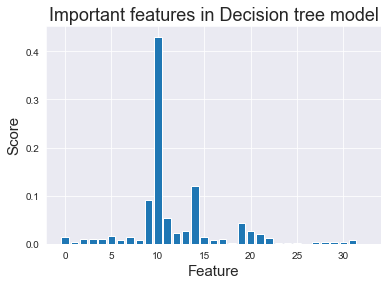

In [464]:
# plotting feature importances
importance = dtclf.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
    #print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

plt.xlabel('Feature', fontsize =15)
plt.ylabel('Score', fontsize =15)
plt.title('Important features in Decision tree model', fontsize =18)
plt.show()

plt.show()

In [465]:
for i,v in enumerate(importance):
    if v > 0.01:
        print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.01366
Feature: 4, Score: 0.01009
Feature: 5, Score: 0.01548
Feature: 7, Score: 0.01469
Feature: 9, Score: 0.09081
Feature: 10, Score: 0.43028
Feature: 11, Score: 0.05296
Feature: 12, Score: 0.02247
Feature: 13, Score: 0.02676
Feature: 14, Score: 0.12089
Feature: 15, Score: 0.01371
Feature: 17, Score: 0.01051
Feature: 19, Score: 0.04279
Feature: 20, Score: 0.02576
Feature: 21, Score: 0.02108
Feature: 22, Score: 0.01182


In [466]:
X.columns[[0,1,9,10,11,12,14]]

Index(['product_age_new', 'product_age_old', 'Road', 'Standard', 'Touring',
       'product_class_high', 'product_class_medium'],
      dtype='object')

# Demo +Trans (first three transactions)

## Split data into training, test, validation

In [72]:
df = PastCust_trans_cut_f3t_labeled_2.merge(PastCust_demo_labeled_2, 
                                   on = 'customer_id',
                                   how = 'inner')

In [73]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster_x',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation',
       'cluster_y'],
      dtype='object')

In [74]:
df.rename(columns = {'cluster_x':'cluster'}, inplace=True)
df.drop('cluster_y', axis=1, inplace=True)

In [75]:
df = df.drop(columns = ['customer_id'], axis=1)

In [76]:
X = df.drop(columns=['cluster']).copy()

In [77]:
X = pd.get_dummies(X) 

In [78]:
y = df['cluster']

In [79]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [80]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [81]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2726, 33), the shape of y_train is  (2726,)
the shape of X_valid is (341, 33), the shape of y_valid is  (341,)
the shape of X_test is (341, 33), the shape of y_test is  (341,)


## Fit model

In [82]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [83]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.48      0.47      0.48       148
         low       0.60      0.61      0.61       193

    accuracy                           0.55       341
   macro avg       0.54      0.54      0.54       341
weighted avg       0.55      0.55      0.55       341



Classification report: DT
-------------------------------
Matthews Coefficient: 0.08


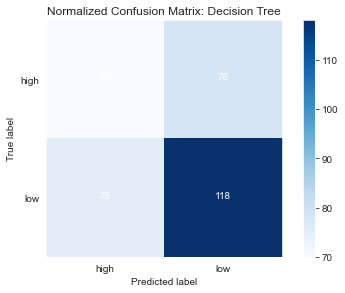

In [84]:
class_names = ['high', 'low']

confusion_matrix(y_test,y_predict)

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [85]:
confusion_matrix(y_test,y_predict)

array([[ 70,  78],
       [ 75, 118]])

# Demo + Trans (first three months)

## Split data into training, test, validaion

In [87]:
df = PastCust_trans_cut_f3m_labeled_2.merge(PastCust_demo_labeled_2, 
                                   on = 'customer_id',
                                   how = 'inner')

In [88]:
df.columns

Index(['customer_id', 'product_age_new', 'product_age_old', 'Giant Bicycles',
       'Norco Bicycles', 'OHM Cycles', 'Solex', 'Trek Bicycles', 'WeareA2B',
       'Mountain', 'Road', 'Standard', 'Touring', 'product_class_high',
       'product_class_low', 'product_class_medium', 'product_size_large',
       'product_size_medium', 'product_size_small', 'multi_trans', 'cluster_x',
       'gender', 'past_3_years_bike_related_purchases', 'wealth_segment',
       'owns_car', 'tenure', 'age', 'state', 'property_valuation',
       'cluster_y'],
      dtype='object')

In [89]:
df.rename(columns = {'cluster_x':'cluster'}, inplace=True)
df.drop('cluster_y', axis=1, inplace=True)

In [90]:
df = df.drop(columns = ['customer_id'], axis=1)

In [91]:
X = df.drop(columns=['cluster']).copy()

In [92]:
X = pd.get_dummies(X) 

In [93]:
y = df['cluster']

In [94]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

In [95]:
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [96]:
# check datasets shape
print(f'the shape of X_train is {X_train.shape}, the shape of y_train is  {y_train.shape}')
print(f'the shape of X_valid is {X_valid.shape}, the shape of y_valid is  {y_valid.shape}')
print(f'the shape of X_test is {X_test.shape}, the shape of y_test is  {y_test.shape}')

the shape of X_train is (2033, 33), the shape of y_train is  (2033,)
the shape of X_valid is (254, 33), the shape of y_valid is  (254,)
the shape of X_test is (255, 33), the shape of y_test is  (255,)


## Fit model

In [97]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)

In [98]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

        high       0.50      0.55      0.53       119
         low       0.57      0.52      0.55       136

    accuracy                           0.54       255
   macro avg       0.54      0.54      0.54       255
weighted avg       0.54      0.54      0.54       255



Classification report: DT
-------------------------------
Matthews Coefficient: 0.08


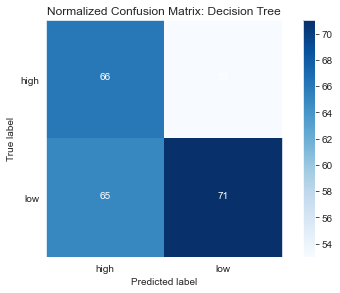

In [99]:
class_names = ['high', 'low']

confusion_matrix(y_test,y_predict)

plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=False,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [100]:
confusion_matrix(y_test,y_predict)

array([[66, 53],
       [65, 71]])

# Model Comparison

| Model # | Data used | F-1 | Matthews_Coefficient |
| --- | --- | --- | --- |
| 1 | transaction data (2017 yr) | 0.83 | 0.66 |
| 2 | transaction data (first three transactions) | 0.54 | 0.07 |
| 3 | transaction data (first three months) | 0.55 | 0.1 |
| 4 | demographic data | 0.50 | -0.03 |
| 5 | demographic + transaction data (2017 yr) | 0.86 | 0.71 |
| 6 | demographic + transaction data (first three transactions) | 0.55 | 0.08 |
| 7 | demographic + transaction data (first three months) | 0.54 | 0.08 |